# Problem 1

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from sklearn.cluster import KMeans, SpectralClustering
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score

seed = 42
np.random.seed(seed)

## part a


In [42]:
# Setting up SSBM graph
n = 30
k = 3
A = 0.7
B = 0.1

sizes = [n // k] * k

p_matrix = np.full((k, k), B)
np.fill_diagonal(p_matrix, A)

def create_ssbm_graph(seed):
    G = nx.stochastic_block_model(sizes, p_matrix, seed=seed)
    return G, nx.to_numpy_array(G)

In [43]:
# clustering

def train_kmeans(mat, n_clusters, seed):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    return kmeans.fit_predict(mat)

def train_spectral(mat, n_clusters, seed):
    spectral_ssbm = SpectralClustering(
        n_clusters=n_clusters,
        affinity="precomputed",
        assign_labels="kmeans",
        random_state=seed,
    )
    return spectral_ssbm.fit_predict(mat)


In [44]:
# plot results

def visualize_clustering(G, true_labels, labels_kmeans, labels_spectral):
    pos = nx.spring_layout(G, seed=seed)
    fig, axes = plt.subplots(1, 3, figsize=(16, 4.5))

    # plot ground truth
    nx.draw_networkx(
        G,
        pos=pos,
        node_color=true_labels,
        node_size=220,
        with_labels=True,
        font_size=8,
        ax=axes[0],
    )
    axes[0].set_title("Ground truth communities")

    # plot kmeans
    nx.draw_networkx(
        G,
        pos=pos,
        node_color=labels_kmeans,
        node_size=220,
        with_labels=True,
        font_size=8,
        ax=axes[1],
    )
    axes[1].set_title(f"k-means on adjacency rows")

    # plot spectral clustering
    nx.draw_networkx(
        G,
        pos=pos,
        node_color=labels_spectral,
        node_size=220,
        with_labels=True,
        font_size=8,
        ax=axes[2],
    )
    axes[2].set_title(f"Spectral clustering")

    plt.tight_layout()
    plt.show()

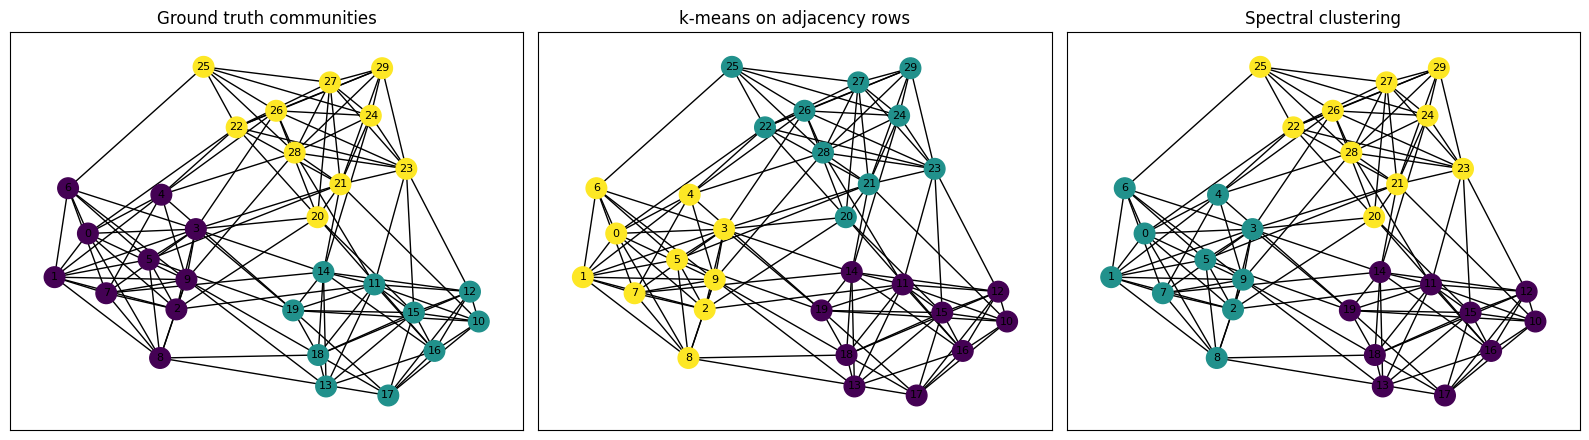

In [45]:
G_ssbm, mat_ssbm = create_ssbm_graph(seed)
true_labels_ssbm = []
for i in range(k):
    true_labels_ssbm.extend([i] * (sizes[i]))
true_labels_ssbm = np.array(true_labels_ssbm)
labels_kmeans_ssbm = train_kmeans(mat_ssbm, k, seed)
labels_spectral_ssbm = train_spectral(mat_ssbm, k, seed)
visualize_clustering(G_ssbm, true_labels_ssbm, labels_kmeans_ssbm, labels_spectral_ssbm)

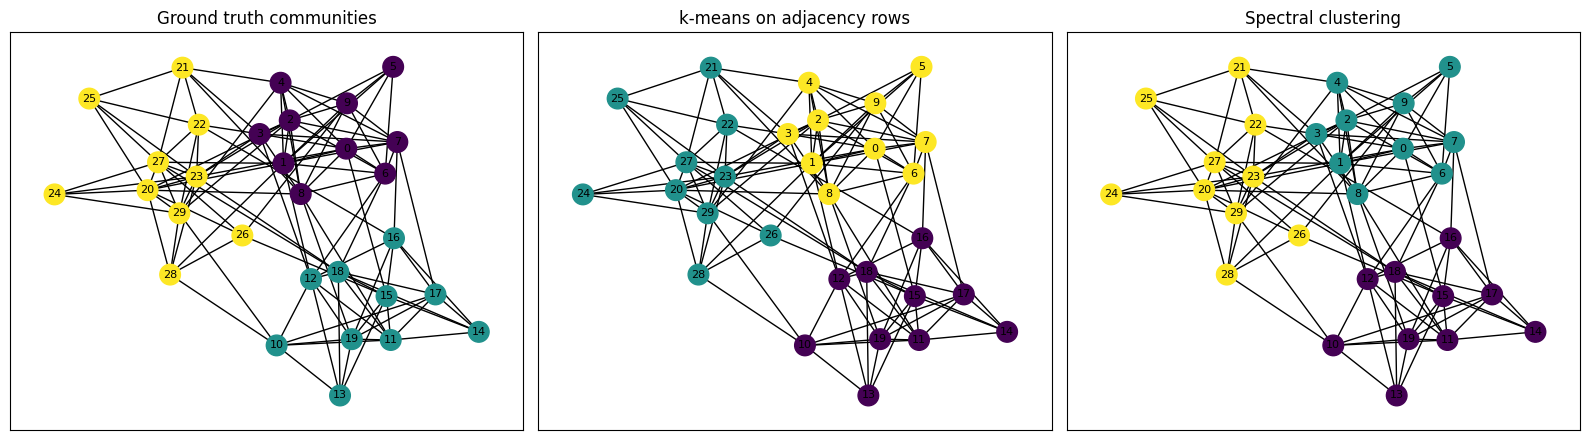

In [46]:
G_ssbm, mat_ssbm = create_ssbm_graph(420)
true_labels_ssbm = []
for i in range(k):
    true_labels_ssbm.extend([i] * (sizes[i]))
true_labels_ssbm = np.array(true_labels_ssbm)
labels_kmeans_ssbm = train_kmeans(mat_ssbm, k, seed)
labels_spectral_ssbm = train_spectral(mat_ssbm, k, seed)
visualize_clustering(G_ssbm, true_labels_ssbm, labels_kmeans_ssbm, labels_spectral_ssbm)

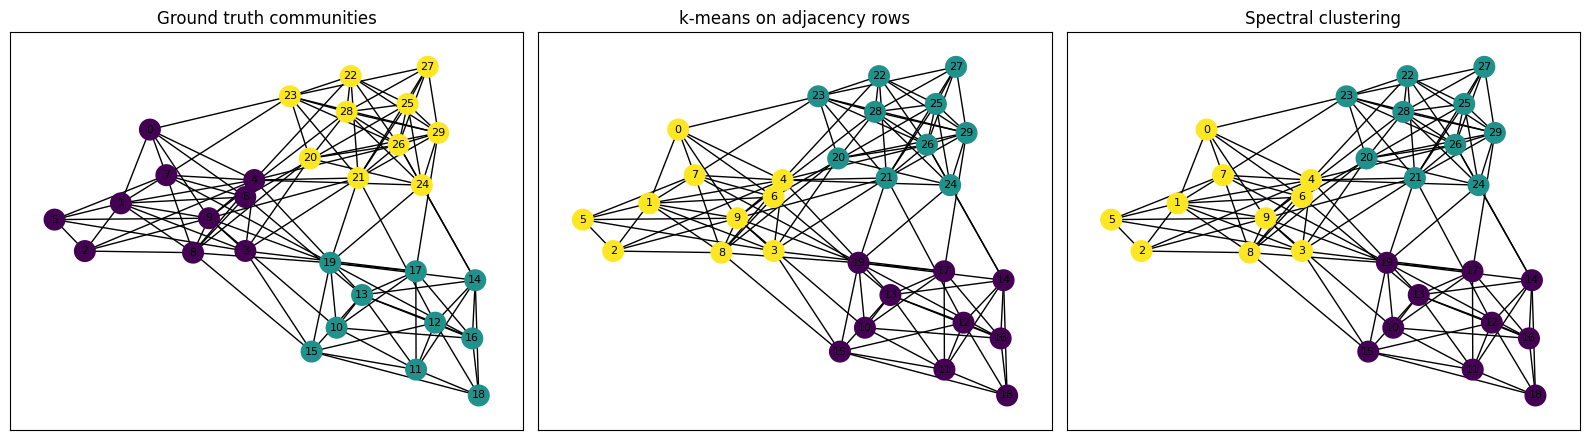

In [47]:
G_ssbm, mat_ssbm = create_ssbm_graph(67)
true_labels_ssbm = []
for i in range(k):
    true_labels_ssbm.extend([i] * (sizes[i]))
true_labels_ssbm = np.array(true_labels_ssbm)
labels_kmeans_ssbm = train_kmeans(mat_ssbm, k, seed)
labels_spectral_ssbm = train_spectral(mat_ssbm, k, seed)
visualize_clustering(G_ssbm, true_labels_ssbm, labels_kmeans_ssbm, labels_spectral_ssbm)

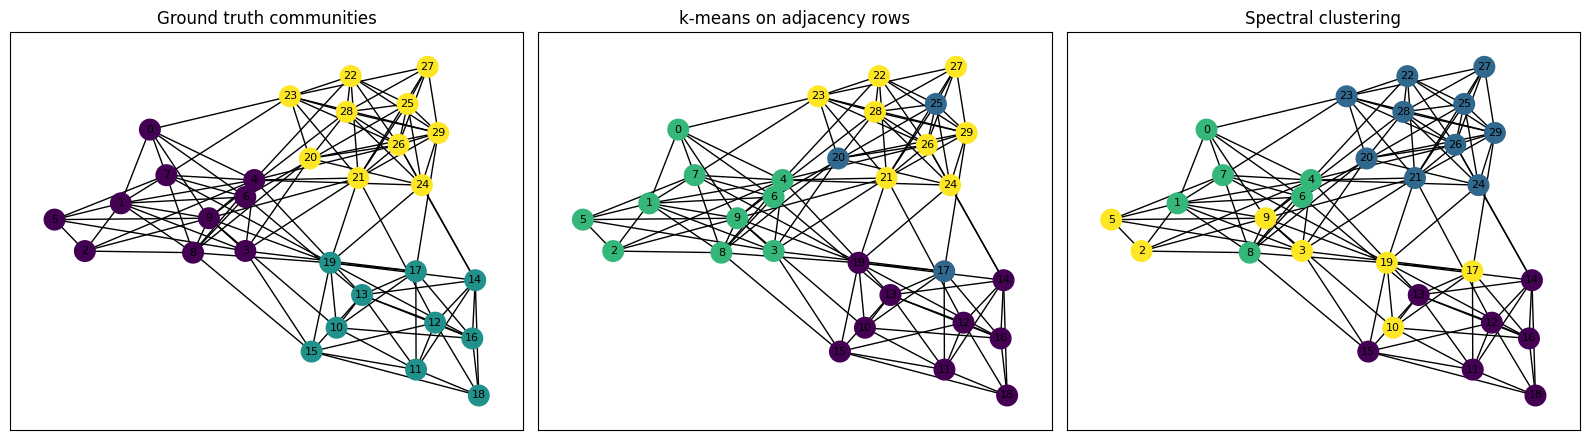

In [48]:
labels_kmeans_ssbm = train_kmeans(mat_ssbm, 4, seed)
labels_spectral_ssbm = train_spectral(mat_ssbm, 4, seed)
visualize_clustering(G_ssbm, true_labels_ssbm, labels_kmeans_ssbm, labels_spectral_ssbm)

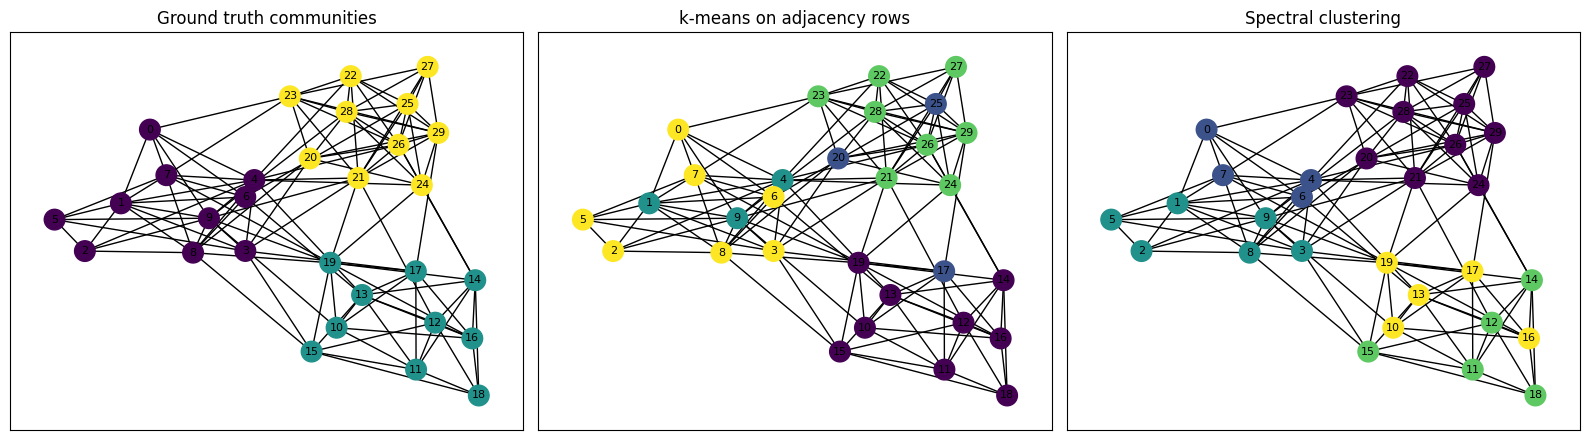

In [51]:
labels_kmeans_ssbm = train_kmeans(mat_ssbm, 5, seed)
labels_spectral_ssbm = train_spectral(mat_ssbm, 5, seed)
visualize_clustering(G_ssbm, true_labels_ssbm, labels_kmeans_ssbm, labels_spectral_ssbm)

In [49]:
from sklearn.metrics import adjusted_rand_score

avg_ari_kmeans = 0
avg_ari_spectral = 0
low, high = 2, 10
for n_clusters in range(low, high + 1):
    labels_kmeans_ssbm = train_kmeans(mat_ssbm, n_clusters, seed)
    labels_spectral_ssbm = train_spectral(mat_ssbm, n_clusters, seed)
    ari_kmeans_ssbm = adjusted_rand_score(true_labels_ssbm, labels_kmeans_ssbm)
    ari_spectral_ssbm = adjusted_rand_score(true_labels_ssbm, labels_spectral_ssbm)
    avg_ari_kmeans += ari_kmeans_ssbm
    avg_ari_spectral += ari_spectral_ssbm
    print(f"k-means ARI: {ari_kmeans_ssbm:.3f}, Spectral ARI: {ari_spectral_ssbm:.3f} for {n_clusters} clusters")
avg_ari_kmeans /= (high - low + 1)
avg_ari_spectral /= (high - low + 1)
print(f"Average k-means ARI: {avg_ari_kmeans:.3f}, Average spectral ARI: {avg_ari_spectral:.3f}")


k-means ARI: 0.554, Spectral ARI: 0.554 for 2 clusters
k-means ARI: 1.000, Spectral ARI: 1.000 for 3 clusters
k-means ARI: 0.848, Spectral ARI: 0.672 for 4 clusters
k-means ARI: 0.717, Spectral ARI: 0.708 for 5 clusters
k-means ARI: 0.643, Spectral ARI: 0.551 for 6 clusters
k-means ARI: 0.547, Spectral ARI: 0.556 for 7 clusters
k-means ARI: 0.464, Spectral ARI: 0.315 for 8 clusters
k-means ARI: 0.416, Spectral ARI: 0.290 for 9 clusters
k-means ARI: 0.351, Spectral ARI: 0.186 for 10 clusters
Average k-means ARI: 0.615, Average spectral ARI: 0.537


## part b

Circle ARI (k-means):   -0.002
Circle ARI (spectral):  1.000


/Users/marco/school/cs144/.venv/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:324: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


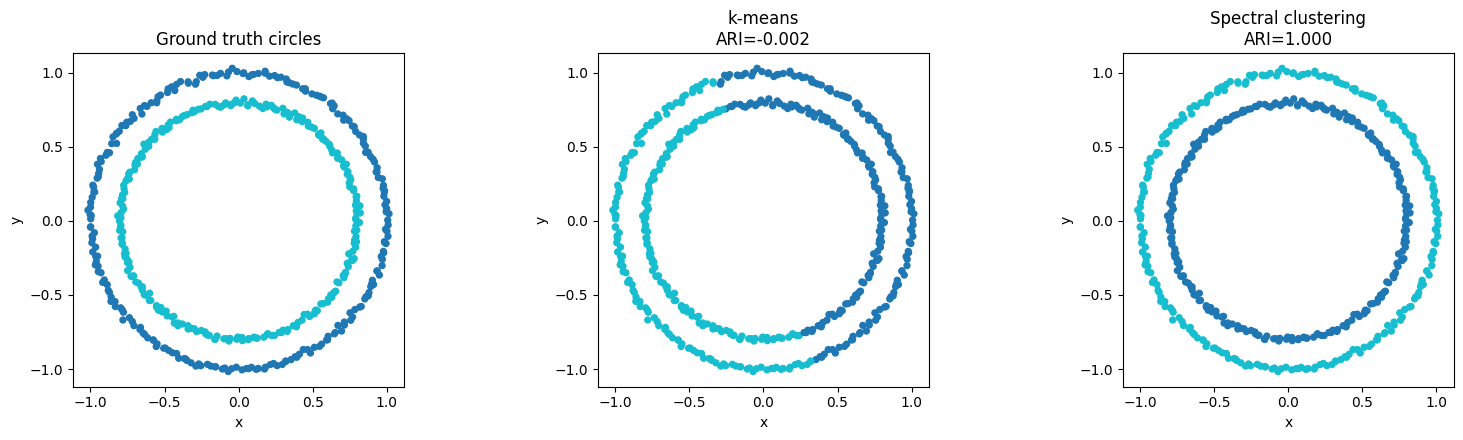

In [50]:
n_circles = 500
noise = 0.01
k_circles = 2

X, y_true = make_circles(
    n_samples=n_circles,
    factor=0.8,
    noise=noise,
    random_state=seed,
)

kmeans_circles = KMeans(n_clusters=k_circles, random_state=seed, n_init=20)
labels_kmeans_circles = kmeans_circles.fit_predict(X)

spectral_circles = SpectralClustering(
    n_clusters=k_circles,
    affinity="nearest_neighbors",
    n_neighbors=12,
    assign_labels="kmeans",
    random_state=seed,
)
labels_spectral_circles = spectral_circles.fit_predict(X)

ari_kmeans_circles = adjusted_rand_score(y_true, labels_kmeans_circles)
ari_spectral_circles = adjusted_rand_score(y_true, labels_spectral_circles)

print(f"Circle ARI (k-means):   {ari_kmeans_circles:.3f}")
print(f"Circle ARI (spectral):  {ari_spectral_circles:.3f}")

fig, axes = plt.subplots(1, 3, figsize=(16, 4.5))

axes[0].scatter(X[:, 0], X[:, 1], c=y_true, s=18, cmap="tab10")
axes[0].set_title("Ground truth circles")
axes[0].set_aspect("equal")

axes[1].scatter(X[:, 0], X[:, 1], c=labels_kmeans_circles, s=18, cmap="tab10")
axes[1].set_title(f"k-means\nARI={ari_kmeans_circles:.3f}")
axes[1].set_aspect("equal")

axes[2].scatter(X[:, 0], X[:, 1], c=labels_spectral_circles, s=18, cmap="tab10")
axes[2].set_title(f"Spectral clustering\nARI={ari_spectral_circles:.3f}")
axes[2].set_aspect("equal")

for ax in axes:
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()